In [ ]:
import numpy
class Weibull:
    def __init__(self, data):
        pass


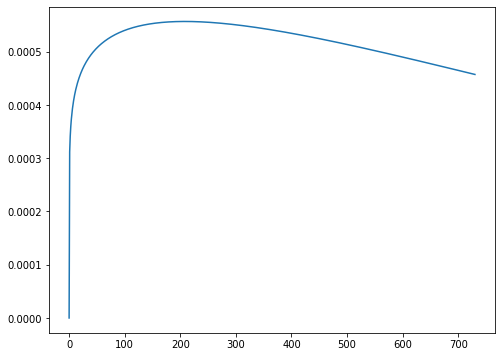

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
data = pd.read_csv("E:\Term 8\RISK\HWs\HW7\data_drivers.csv")
plt.figure(figsize=(8,6))
lifetimes = np.sort(data.lifetime)
shape_parameter = 1.13
scale_parameter = 1410.6
weib = st.weibull_min.stats(shape_parameter, loc)
probs = st.weibull_min.pdf(lifetimes, 1.13, 0 , 1410.6)
plt.plot(lifetimes, probs)


In [48]:
import pandas as pd
import numpy as np
from scipy.stats import norm 
from scipy.special import gammaln
class Weibull:
    """
    Input a vector data
    """
    def __init__(self, data):
        """
        data is a vector
        """
        self.x = data
        self.calc_mean()
        self.calc_std()
        self._calc_parameters()

    def calc_mean(self):
        self.mean = np.mean(self.x)
    
    def calc_std(self):
        self.std = np.std(self.x)

    def _calc_parameters(self):

        self.alpha = 0.1
        first_elemnt = 1 + (1/self.alpha)
        second_element = 1 + 2/self.alpha
        third_element = 1 + 1/self.alpha
        final_value = self.mean/self.std
        to_check_value = (self.get_gamma(first_elemnt)/((self.get_gamma(second_element) - (self.get_gamma(third_element))**2)**0.5))
        while(abs(to_check_value -final_value) > 0.01):
            self.alpha += 0.01
            first_elemnt = 1 + (1/self.alpha)
            second_element = 1 + 2/self.alpha
            third_element = 1 + 1/self.alpha
            to_check_value = (self.get_gamma(first_elemnt)/((self.get_gamma(second_element) - (self.get_gamma(third_element))**2)**0.5))
        self.beta = (self.mean)/(self.get_gamma((1 + (1/self.alpha))))   
        return(self.alpha, self.beta) 

    def get_beta(self):
        return self.beta

    def get_alpha(self):
        return self.alpha

    def get_gamma(self, value):
        return np.exp(gammaln(value))

data = pd.read_csv("../../concrete_data.csv")
x = data.data
weibull = Weibull(x)
print(weibull.get_beta())



41.906305305850076
